# Exercises Week 4

In [198]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## TB2.2

In [199]:
fd_earth = 1.37 # [KW/m2]

def fd(ua,fd = fd_earth):
    # if 1.37 -> 1 UA
    # fd <- (ua)^2
    return fd_earth/ua**2

In [200]:
data = [["Venus",0.7],["Mars",1.5],["Jupiter",5.2],["Saturn",9.5]]
col = ["Name","UA"]
table = pd.DataFrame(data=data,columns=col)
table["Flux Density"] = [fd(i) for i in table["UA"].tolist()]
ld = 0.4e-6 # lambda 
c = 3e8 # speed of light
f = c/ld # frequency
h = 6.63e-34 # m2Kg/s
e_photon = h*f
table["Photons"] = [q*10**3/e_photon for q in table["Flux Density"].tolist()]
#print(table)
display(table)

,Name,UA,Flux Density,Photons
0,Venus,0.7,2.795918,5.622762e+21
1,Mars,1.5,0.608889,1.224513e+21
2,Jupiter,5.2,0.050666,1.018918e+20
3,Saturn,9.5,0.015180,3.052801e+19


## TB2.3

In [214]:
k = 1.38e-23 # J/K
def S(l,T=6000):
    return ((2*np.pi*h*np.power(c,2))/(np.power(l,5)))*1/(np.exp(c*h/(l*k*T))-1)

In [215]:
intervals = [["UV",0,0.4e-6],
             ["visible",0.4e-6,0.7e-6],
             ["infrared",0.7e-6,10e-6],
             ["thermal ir",10e-6,3e-3],
             ["microwave",3e-3,1e10]]

ex2_table = pd.DataFrame(data=intervals,columns=["Name","interval low","interval high"])
#print(ex2_table)
display(ex2_table)

,Name,interval low,interval high
0,UV,0.000000e+00,4.000000e-07
1,visible,4.000000e-07,7.000000e-07
2,infrared,7.000000e-07,1.000000e-05
3,thermal ir,1.000000e-05,3.000000e-03
4,microwave,3.000000e-03,1.000000e+10


In [216]:
from scipy.integrate import quad

#total,e = quad(S,ex2_table["interval low"].min(),ex2_table["interval high"].max())
sigma = 5.669e-8
T = 6000
total = sigma*T**4

def integral(d):
    i,e = quad(S,d["interval low"],d["interval high"])
    return i/total*100

ex2_table["Percentage"] = ex2_table.apply(integral,axis=1)
display(ex2_table.style.format({"Percentage":"{:,.3f} %".format}))

#ex2_table.append(pd.DataFrame([["test",100,100,0.5]],columns=ex2_table.columns),ignore_index=True)


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,interval low,interval high,Percentage
0,UV,0,4e-07,13.872 %
1,visible,4e-07,7e-07,37.356 %
2,infrared,7e-07,1e-05,48.228 %
3,thermal ir,1e-05,0.003,0.065 %
4,microwave,0.003,1e+10,0.000 %


In [299]:
i,e = quad(S,7e-3,1e10)
print(i)
print(total)

3.2927212911243152e-31
73470240.0


## TB2.9

In [217]:
temps = [["Sun",6000],["Venus",600],["Earth",300],["Mars",200],["Titan",120]]
col = ["Planet","Temp"]
planets = pd.DataFrame(data=temps,columns=col)
display(planets)

,Planet,Temp
0,Sun,6000
1,Venus,600
2,Earth,300
3,Mars,200
4,Titan,120


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


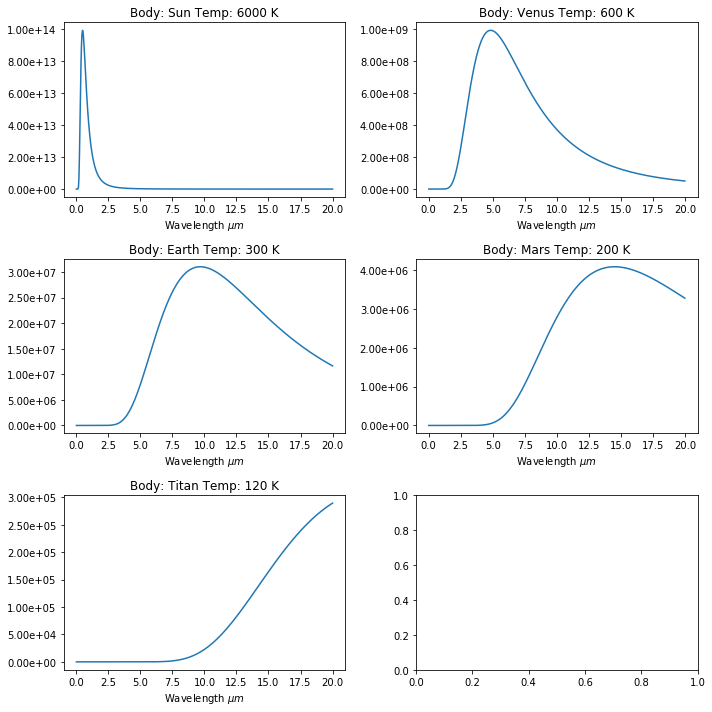

In [270]:
from matplotlib.ticker import FormatStrFormatter

labels = []
l_range = np.linspace(1e-10,20e-6,num=500)
p_to_plot = ["Sun","Earth","Venus","Mars","Titan"]
forplot = planets[planets["Planet"].isin(p_to_plot)]
f,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
for i,row in forplot.iterrows():    
    ax.ravel()[i].plot(1e6*l_range,S(l_range,row["Temp"]),label=row["Planet"])
    ax.ravel()[i].set_title("Body: "+row["Planet"]+" Temp: "+str(row["Temp"]) + " K")
    ax.ravel()[i].set_xlabel("Wavelength $\mu m$")
    ax.ravel()[i].yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
#plt.legend(loc="best")
#f.subplots_adjust(hspace=0.1,wspace=0.1)
plt.tight_layout()        

In [280]:
def max_wavelength(data):
    T = data["Temp"]
    a = 2898e-6
    return a/T

In [281]:
planets["Max wavelength"] = planets.apply(max_wavelength,axis=1)
display(planets)

,Planet,Temp,Max wavelength
0,Sun,6000,4.830000e-07
1,Venus,600,4.830000e-06
2,Earth,300,9.660000e-06
3,Mars,200,1.449000e-05
4,Titan,120,2.415000e-05


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


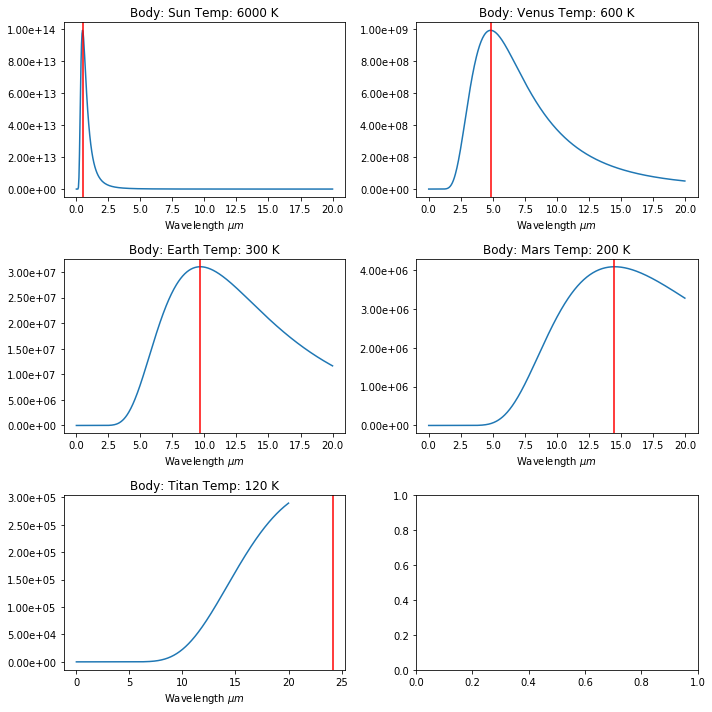

In [286]:
labels = []
l_range = np.linspace(1e-10,20e-6,num=500)
p_to_plot = ["Sun","Earth","Venus","Mars","Titan"]
forplot = planets[planets["Planet"].isin(p_to_plot)]
f,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
for i,row in forplot.iterrows():    
    ax.ravel()[i].plot(1e6*l_range,S(l_range,row["Temp"]),label=row["Planet"])
    ax.ravel()[i].axvline(x=1e6*row["Max wavelength"],color="red")
    ax.ravel()[i].set_title("Body: "+row["Planet"]+" Temp: "+str(row["Temp"]) + " K")
    ax.ravel()[i].set_xlabel("Wavelength $\mu m$")
    ax.ravel()[i].yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
#plt.legend(loc="best")
#f.subplots_adjust(hspace=0.1,wspace=0.1)
plt.tight_layout() 

## TB2.10

In [301]:
d = 1000e3
total_area = 4*np.pi*d**2
area_mW = total_area*1e-3/1e3
area_uW = total_area*1e-6/1e3

square_mW = np.sqrt(area_mW)
square_uW = np.sqrt(area_uW)

circle_mW = np.sqrt(area_mW/(np.pi))
circle_uW = np.sqrt(area_uW/(np.pi))

print("Required area for 1 mW: "+str(area_mW) + " m2"+
     " equivalent to a square of side "+str(square_mW) + " or circle of radious: "+str(circle_mW))


print("Required area for 1 uW: "+str(area_uW) + " m2"+
     " equivalent to a square of side "+str(square_uW) + " or circle of radious: "+str(circle_uW))

Required area for 1 mW: 12566370.614359172 m2 equivalent to a square of side 3544.90770181 or circle of radious: 2000.0
Required area for 1 uW: 12566.370614359172 m2 equivalent to a square of side 112.099824328 or circle of radious: 63.2455532034
